# Term Deposit Subscription Prediction

## Problem Statement

Using the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe term deposit
and thus increase their hit ratio. 

## Dataset

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

**Github Repo**: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-otseobande/tree/master/term-deposit-subscription-prediction

## Import Libraries

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs

## Load Dataset

In [4]:
df = pd.read_csv('bank-full.csv')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Univariate analysis

### Column Datatypes and data frame shape

In [5]:
df.shape

(45211, 17)

The dataset has 45,211 rows and 17 columns (features)

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df.isnull().values.any()

False

No null value can be found in this dataset

#### Convert columns with object types to categorical types

In [35]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.Categorical(df[column])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


#### Attribute meanings

1. **age**: Customer age
2. **job**: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. **marital**: marital status (married, single, divorced)
4. **education**: education level (primary, secondary, tertiary)
5. **default**: has credit in default?
6. **housing**: has housing loan?
7. **loan**: has personal loan?
8. **balance**: balance in account
9. **contact**: contact communication type
10. **month**: last contact month of year
11. **day**: last contact day of the month
12. **duration**: last contact duration, in seconds*
13. **campaign**: number of contacts performed during this campaign and for this client
14. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. **previous**: number of contacts performed before this campaign and for this client
16. **poutcome**: outcome of the previous marketing campaign
17. **Target**: client term deposit subscription status. (Yes, No)

In this dataset, 39,922 customers didn't subscribe for a term deposit while 5,289 customers subscribed to term deposits

In [29]:
for column in df.columns:
    print('{0} unique values in the "{1}" column.'.format(len(df[column].unique()), column))

77 unique values in the "age" column.
12 unique values in the "job" column.
3 unique values in the "marital" column.
4 unique values in the "education" column.
2 unique values in the "default" column.
7168 unique values in the "balance" column.
2 unique values in the "housing" column.
2 unique values in the "loan" column.
3 unique values in the "contact" column.
31 unique values in the "day" column.
12 unique values in the "month" column.
1573 unique values in the "duration" column.
48 unique values in the "campaign" column.
559 unique values in the "pdays" column.
41 unique values in the "previous" column.
4 unique values in the "poutcome" column.
2 unique values in the "Target" column.


### Visualizing Univariate distribution

### Age (Customer age)

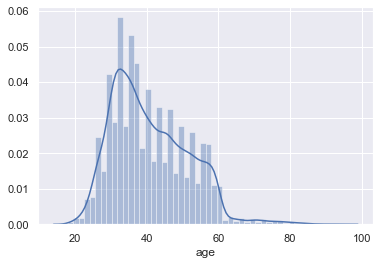

In [23]:
sns.distplot(df['age']);

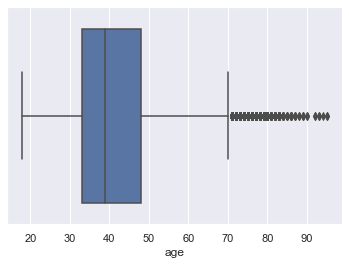

In [25]:
sns.boxplot(df['age']);

The age distribution in the dataset is a left skewed with a few outliners as seen in the box plot.

### Job (Type of job - management, technician, entrepreneur, blue-collar, etc.)

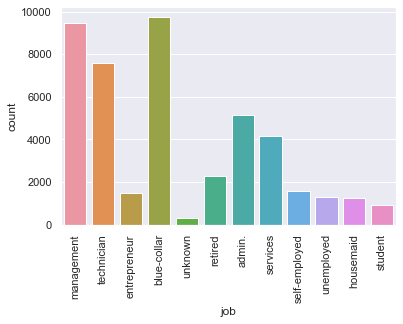

In [31]:
job_plot = sns.countplot(df['job']);
job_plot.set_xticklabels(job_plot.get_xticklabels(), rotation=90);

From this plot, we can see that we have more customers with management and blue-collar jobs in this dataset.

### Marital (marital status - married, single, divorced)

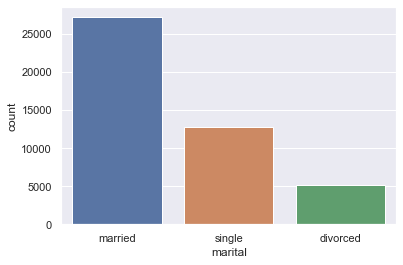

In [32]:
sns.countplot(df['marital']);

### Education (education level - primary, secondary, tertiary)

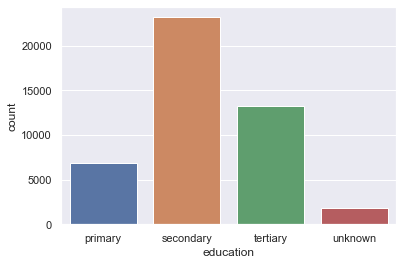

In [38]:
sns.countplot(df['education']);

### Default (has credit in default?)

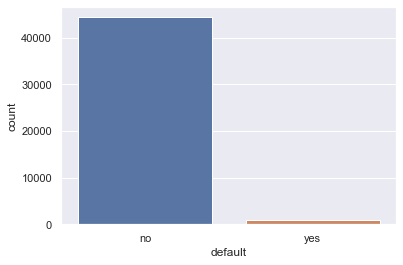

In [39]:
sns.countplot(df['default']);

### Housing (has housing loan?)

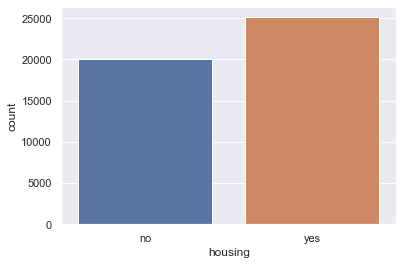

In [41]:
sns.countplot(df['housing']);

### Loan (has personal loan?)

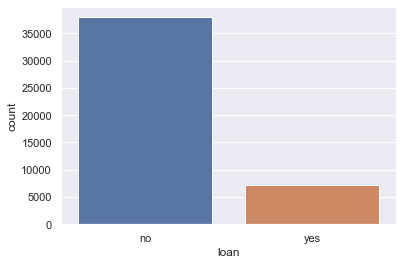

In [42]:
sns.countplot(df['loan']);

### Balance (balance in account)

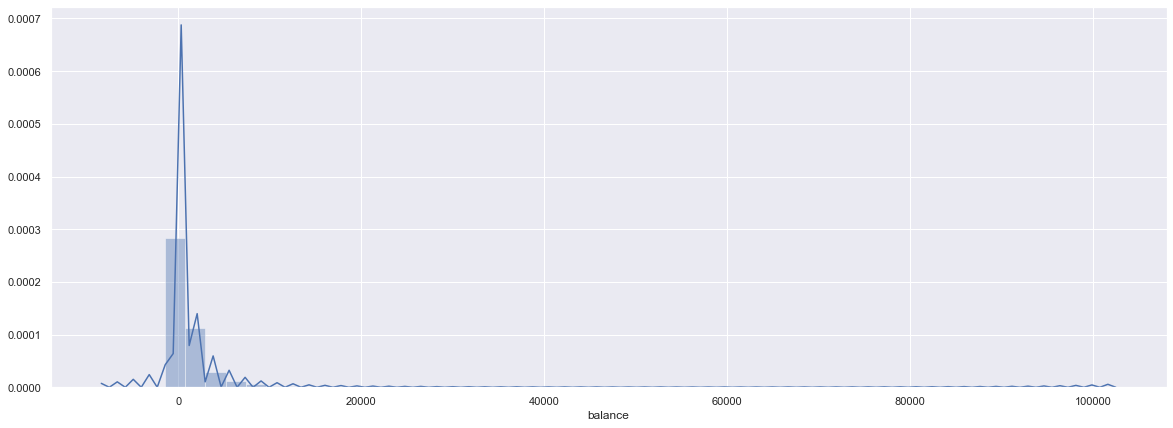

In [51]:
plt.figure(figsize=(20,7))
sns.distplot(df['balance']);

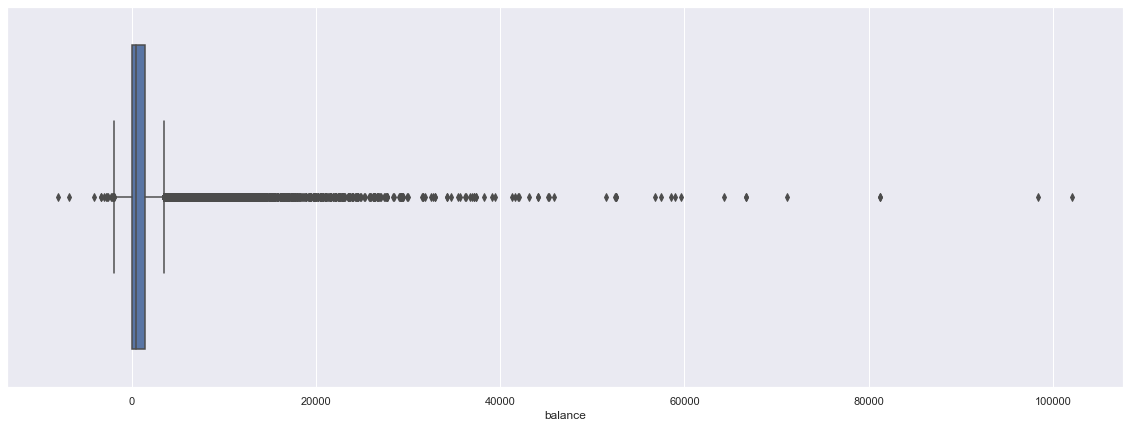

In [53]:
plt.figure(figsize=(20,7))
sns.boxplot(df['balance']);

This distribution shows that customer balances are almost normally distributed but has a lot of outliers.

### Contact (contact communication type)

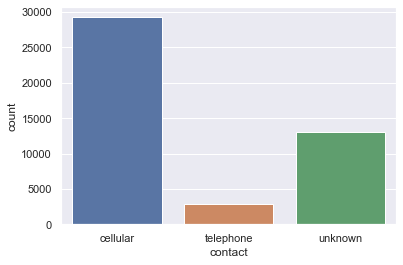

In [55]:
sns.countplot(df['contact']);

In [94]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

### Month (last contact month of year)

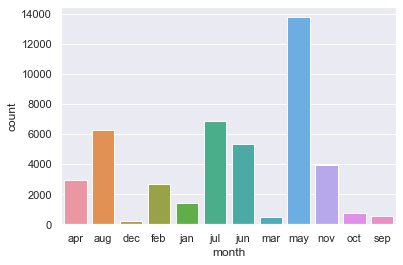

In [58]:
sns.countplot(df['month']);

### Day (last contact day of the month)

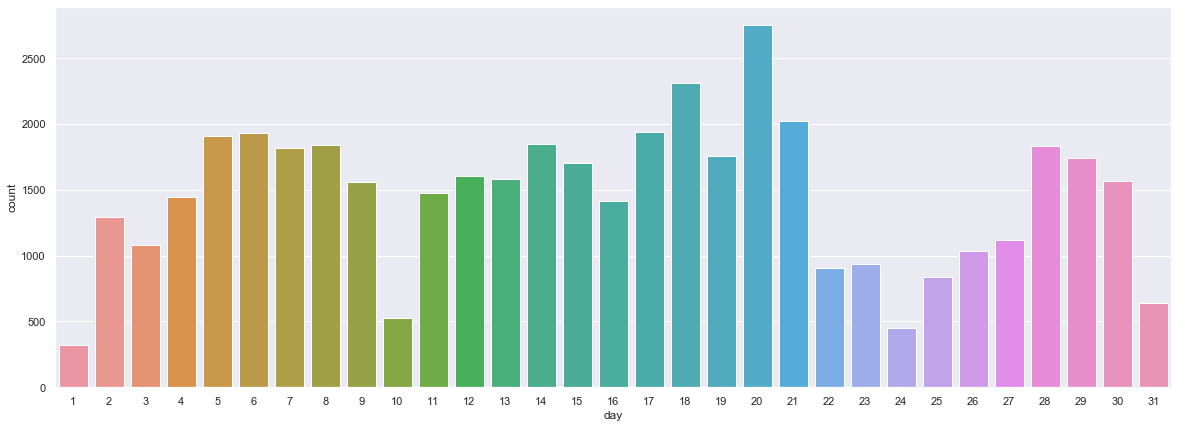

In [113]:
plt.figure(figsize=(20,7))
sns.countplot(df['day']);

### Duration (last contact duration, in seconds)

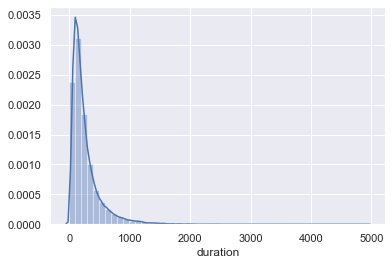

In [64]:
sns.distplot(df['duration']);

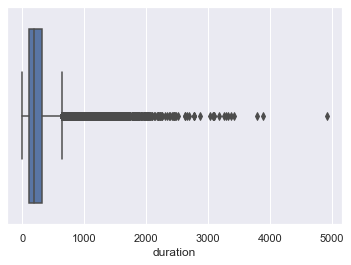

In [67]:
sns.boxplot(df['duration']);

The distribution of the duration of last contact is left skewed showing that less time was spent contacting most of the customers. Some outliers can be observed

### Campaign (number of contacts performed during this campaign and for this client)

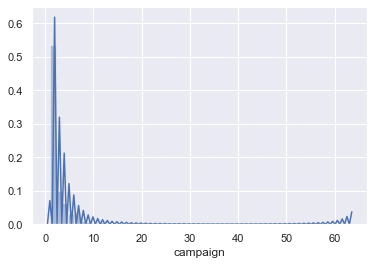

In [66]:
sns.distplot(df['campaign'])

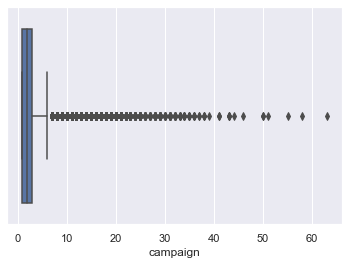

In [68]:
sns.boxplot(df['campaign']);

The distribution of the number of contacts made during the campaign is heavily left skewed with only a few users contacted multiple times and we have obvious outliers who were contacted multiple times. Since there are several outliner spread across various points, I'm going to assume the data is valid

### Pdays (number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days))

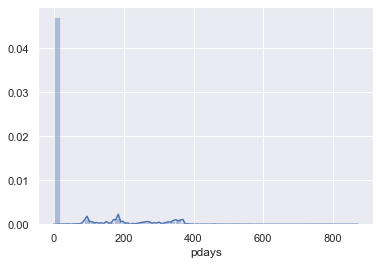

In [74]:
sns.distplot(df['pdays'], kde_kws={'bw': 0.1});

In [75]:
# Users that were not contacted or have not been contacted in the last 900 days

len(df[df['pdays'] == -1])

36954

In [76]:
# Percentage of users that were not contacted or were not contacted in the last 900 days

len(df[df['pdays'] == -1]) / len(df)

0.8173674548229414

81.7% of users were not contacted at all or have not been contacted in the last 900 days

### Previous (number of contacts performed before this campaign and for this client)

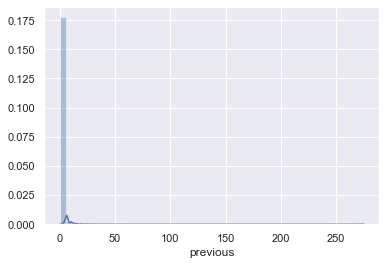

In [80]:
sns.distplot(df['previous'], kde_kws={'bw': 0.1})

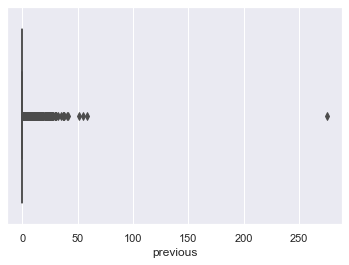

In [83]:
sns.boxplot(df['previous']);

In [85]:
# Percentage of rows with 0 previous contacts before this campaign

len(df[df['previous'] == 0]) / len(df)

0.8173674548229414

81.7% of users had 0 contacts made before this campaign

### Poutcome (outcome of the previous marketing campaign)

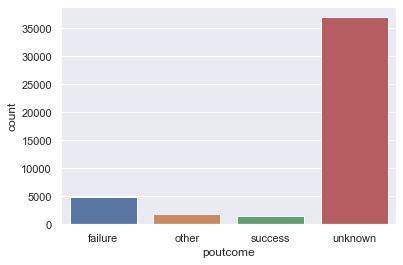

In [91]:
sns.countplot(df['poutcome']);

In [92]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

### Target (client term deposit subscription status. - Yes, No)

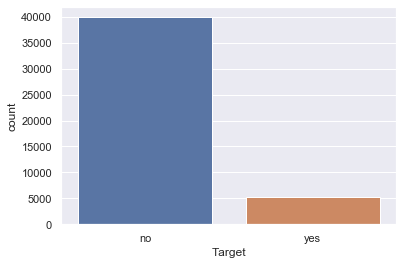

In [95]:
sns.countplot(df['Target'])

In [96]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

## Multivariate analysis

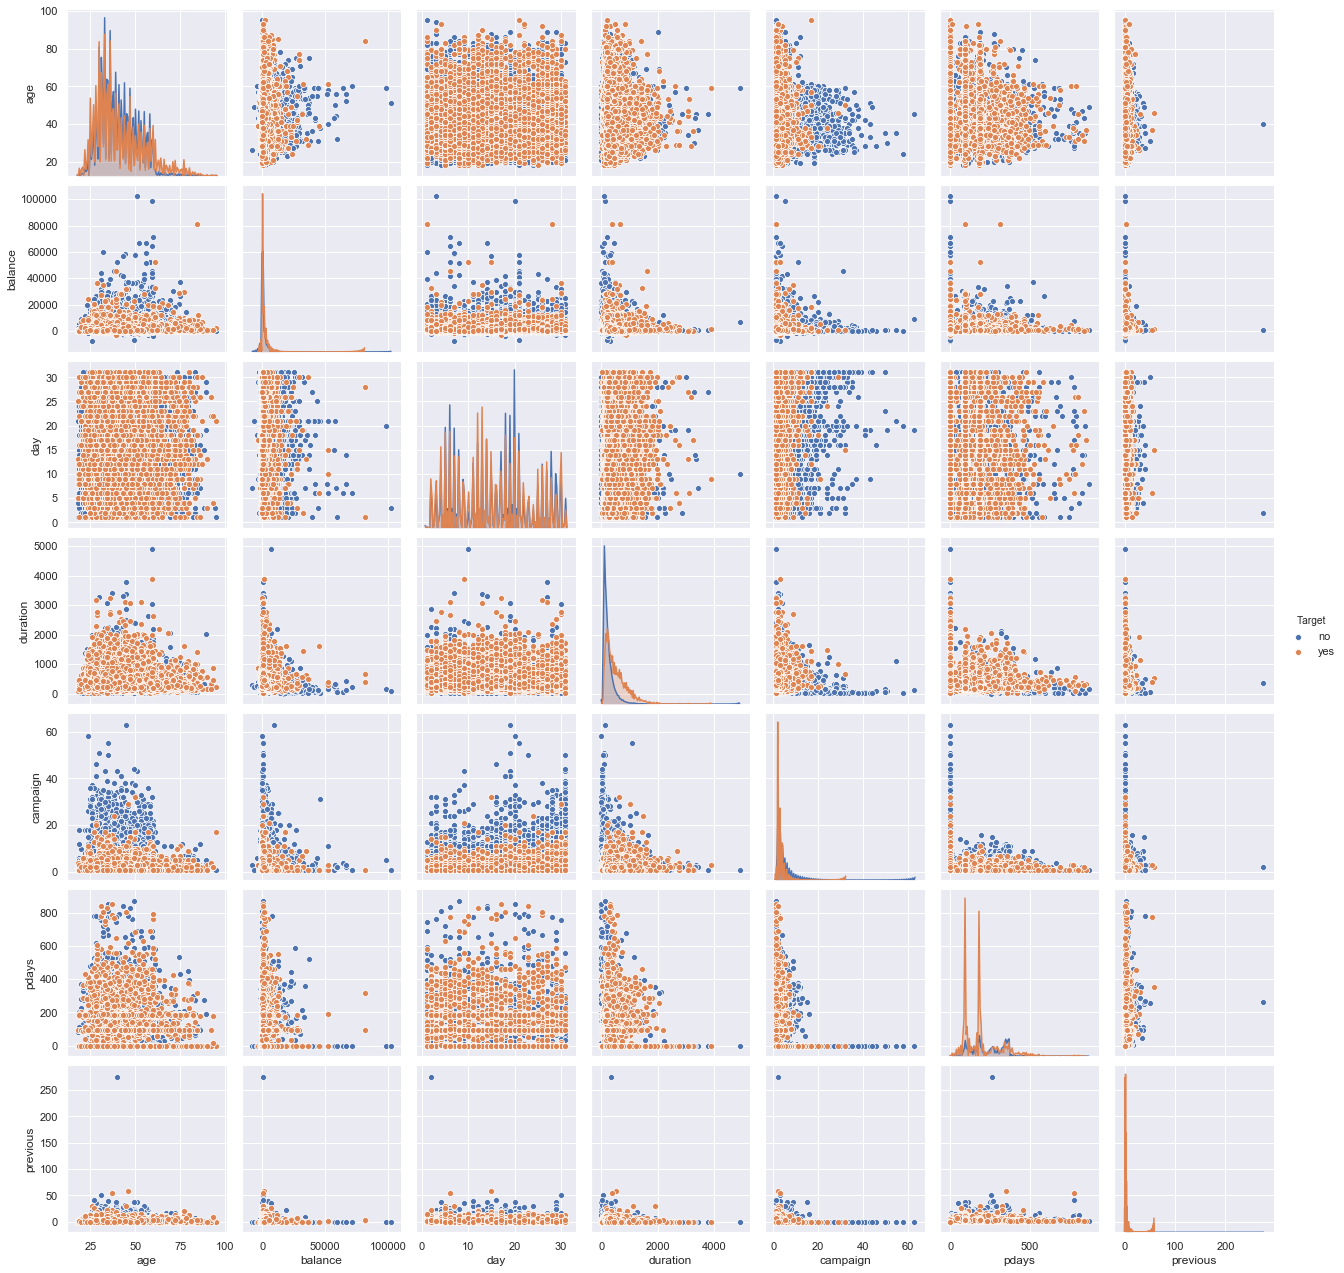

In [103]:
sns.pairplot(df, hue='Target', diag_kws={'bw':0.1});

#### Observation

- It looks like the more the contact duration the more yeses we have for the Target variable

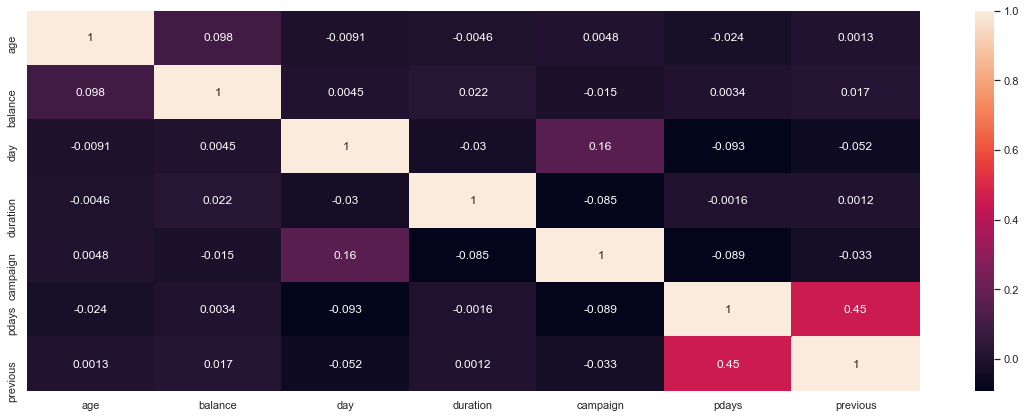

In [105]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot = True);

#### Observations

- The independent variables have very low correlation to each other

#### Job <> Target

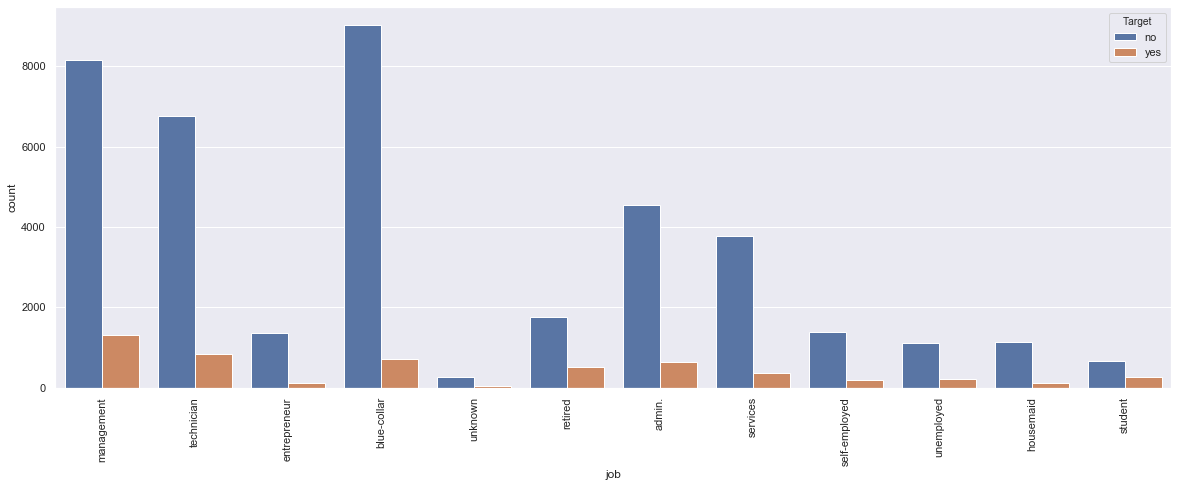

In [30]:
plt.figure(figsize=(20,7))
job_plot = sns.countplot(df['job'], hue=df['Target']);
job_plot.set_xticklabels(job_plot.get_xticklabels(), rotation=90);

##### Observations

- There are more number of No's than yes' in all jobs
- People who work in management seem to have more yes' meaning they subscribed to term loans more

#### Marital <> Target

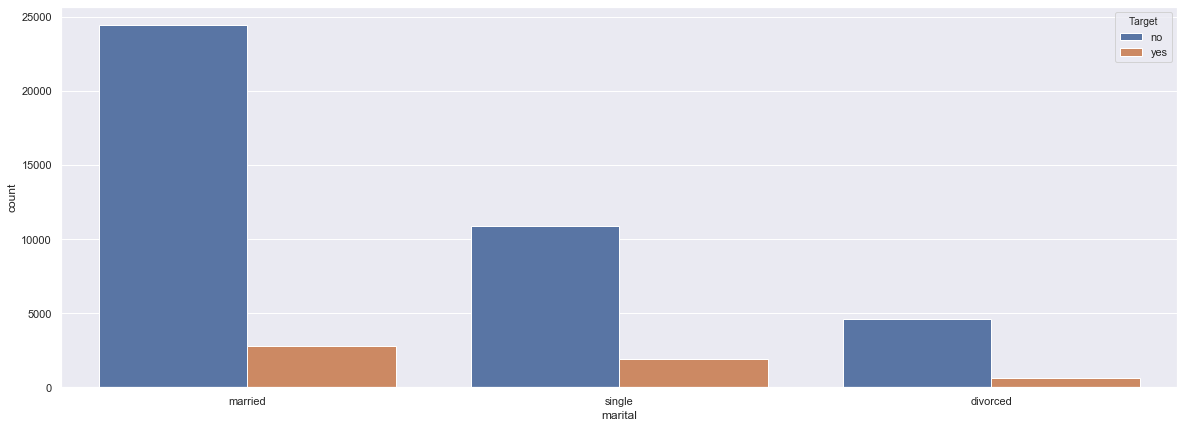

In [32]:
plt.figure(figsize=(20,7))
job_plot = sns.countplot(df['marital'], hue=df['Target']);

#### Education <> Target

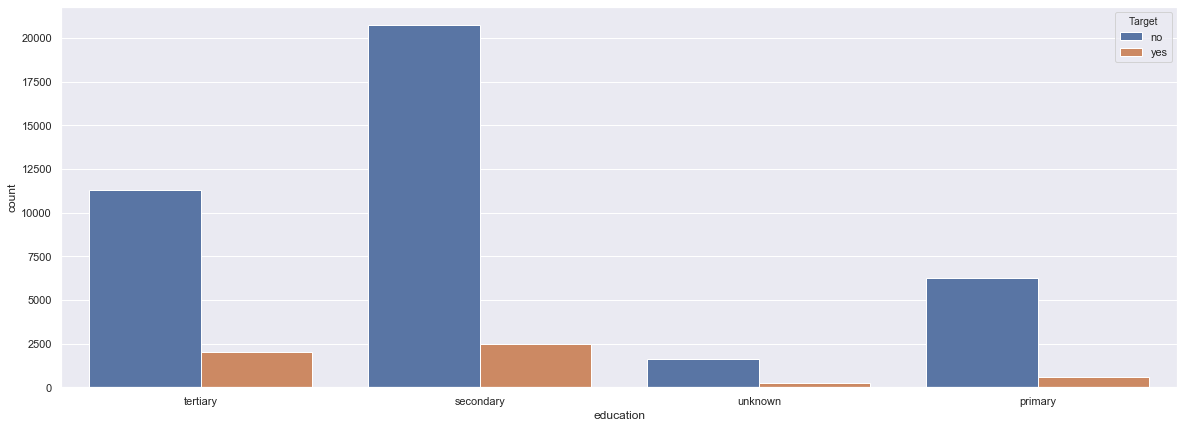

In [33]:
plt.figure(figsize=(20,7))
job_plot = sns.countplot(df['education'], hue=df['Target']);

#### default <> Target

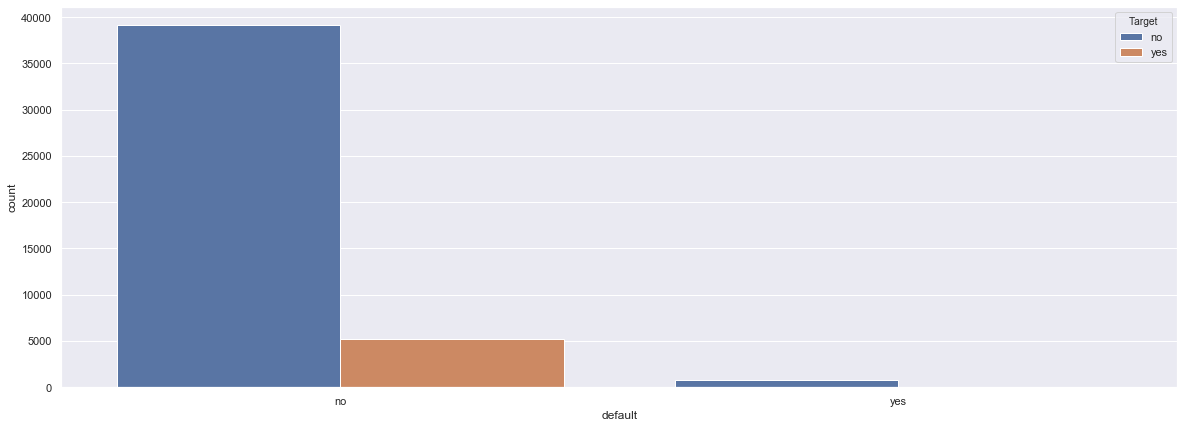

In [34]:
plt.figure(figsize=(20,7))
job_plot = sns.countplot(df['default'], hue=df['Target']);

#### housing <> Target

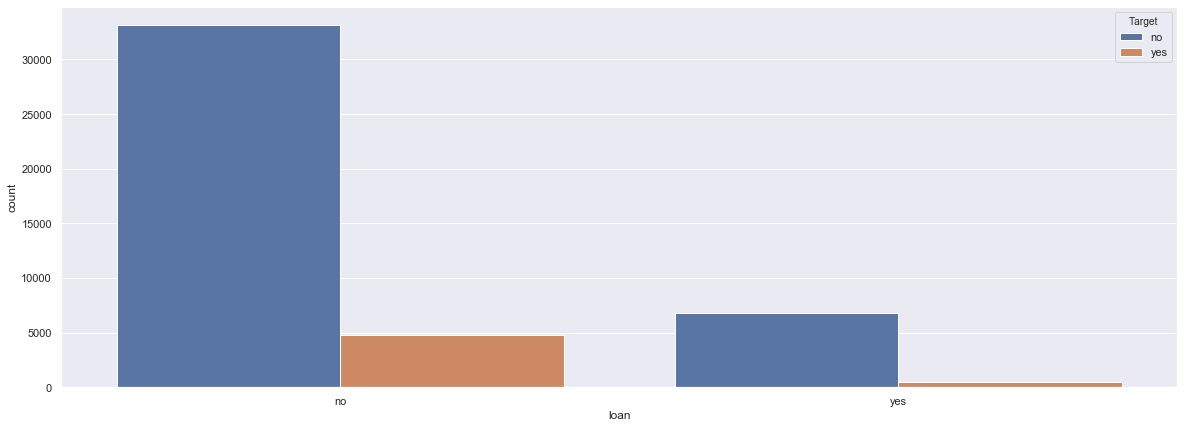

In [37]:
plt.figure(figsize=(20,7))
job_plot = sns.countplot(df['loan'], hue=df['Target']);

#### contact <> Target

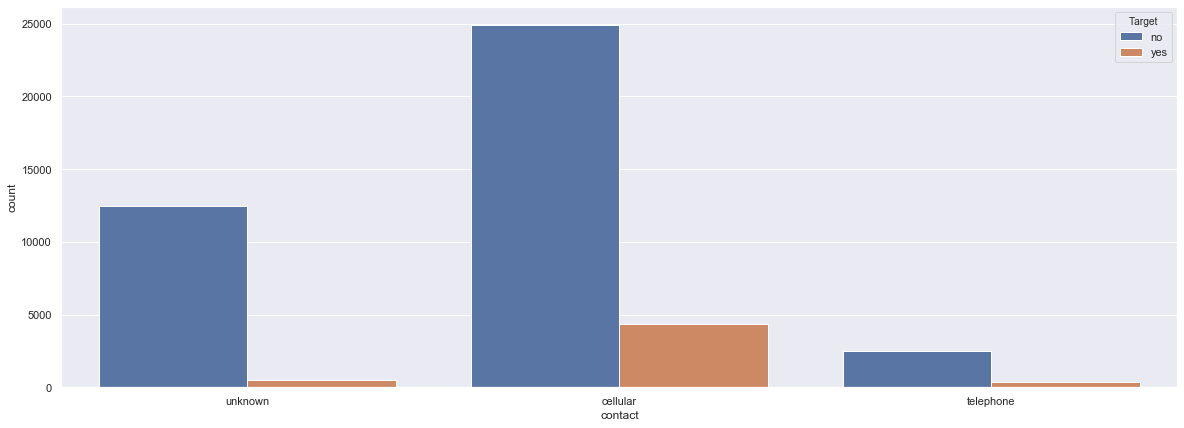

In [38]:
plt.figure(figsize=(20,7))
job_plot = sns.countplot(df['contact'], hue=df['Target']);

#### poutcome <> Target

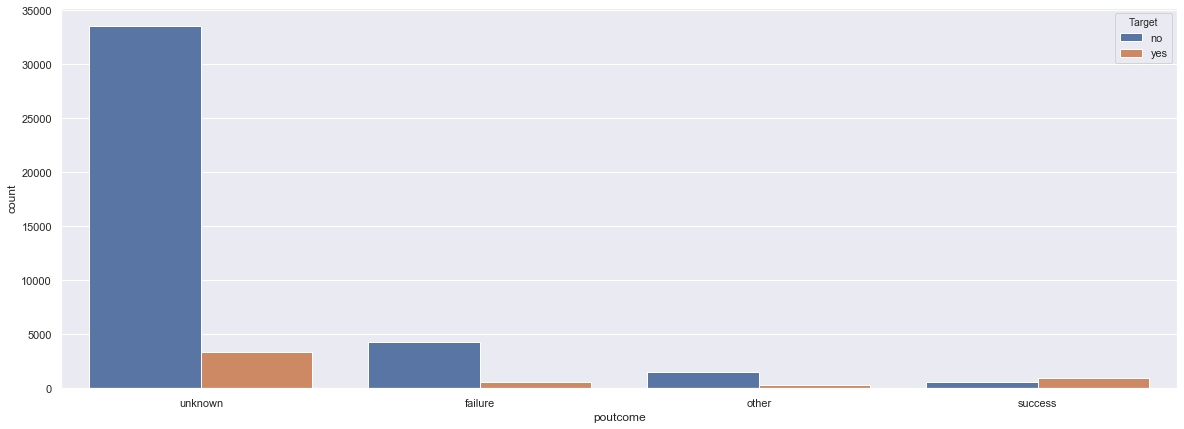

In [39]:
plt.figure(figsize=(20,7))
job_plot = sns.countplot(df['poutcome'], hue=df['Target']);

## Prepare the data for analytics

#### Encode categorical columns using one-hot encoding to ease processing by the algorithms

In [6]:
categorical_columns = [
    'job', 'marital', 'education', 
    'default', 'housing', 'loan', 
    'contact', 'month', 'poutcome', 
    'Target']
encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
encoded_df.head(10)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,42,2,5,380,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8,58,121,5,50,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,43,593,5,55,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


There might be no need to normalized the data as decision trees is not going to be optimized any further because of the normalization

### Split data into test and training set

In [7]:
from sklearn.model_selection import train_test_split

y = encoded_df["Target_yes"]
x = encoded_df.iloc[:, :-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify=encoded_df['Target_yes'])

## Create the models

In [8]:
from sklearn import metrics

def get_scores(actual, prediction):
    print('Accuracy: {:.3f}'.format(metrics.accuracy_score(actual, prediction)))
    print('Recall score: {:.3f}'.format(metrics.recall_score(actual, prediction)))
    print('Precision score: {:.3f}'.format(metrics.precision_score(actual, prediction)))
    print('F1 score: {:.3f}'.format(metrics.f1_score(actual, prediction)))
    print('ROC AUC score: {:.3f}'.format(metrics.roc_auc_score(actual, prediction)))

def plot_cm(actual, prediction):
    cm = metrics.confusion_matrix(actual, prediction, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index=["Yes","No"], columns=["Predict 1","Predict 0"])

    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True);
    
def score_and_plot_cm(model):
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    
    print('------Train data scores-----\n')
    get_scores(y_train, y_train_predict)
    print('')
    print('------Test data Scores------\n')
    get_scores(y_test, y_test_predict)
    plot_cm(y_test, y_test_predict)
    

#### Logistic Regression Model

------Train data scores-----

Accuracy: 0.902
Recall score: 0.350
Precision score: 0.654
F1 score: 0.456
ROC AUC score: 0.663

------Test data Scores------

Accuracy: 0.900
Recall score: 0.336
Precision score: 0.639
F1 score: 0.441
ROC AUC score: 0.656


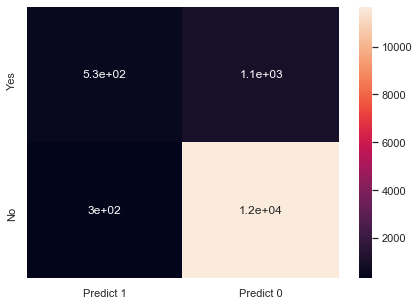

In [10]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
log_reg_model = LogisticRegression(solver="liblinear")
log_reg_model.fit(x_train, y_train)

score_and_plot_cm(log_reg_model)

#### Decision Tree Model

------Train data scores-----

Accuracy: 1.000
Recall score: 1.000
Precision score: 1.000
F1 score: 1.000
ROC AUC score: 1.000

------Test data Scores------

Accuracy: 0.876
Recall score: 0.476
Precision score: 0.471
F1 score: 0.474
ROC AUC score: 0.703


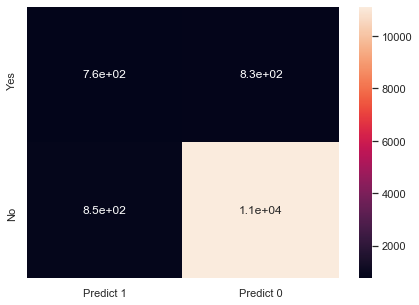

In [11]:
from sklearn.tree import DecisionTreeClassifier

d_tree_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
d_tree_model.fit(x_train, y_train)

score_and_plot_cm(d_tree_model)

#### Ensemble Model - Bagging

------Train data scores-----

Accuracy: 1.000
Recall score: 0.997
Precision score: 1.000
F1 score: 0.999
ROC AUC score: 0.999

------Test data Scores------

Accuracy: 0.904
Recall score: 0.456
Precision score: 0.626
F1 score: 0.528
ROC AUC score: 0.710


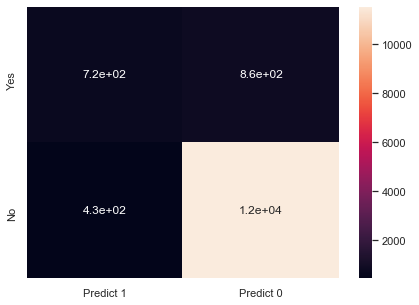

In [12]:
from sklearn.ensemble import BaggingClassifier

bgcl_model = BaggingClassifier(n_estimators=50,random_state=1)
bgcl_model.fit(x_train, y_train)

score_and_plot_cm(bgcl_model)

#### Ensemble Model - AdaBoosting

------Train data scores-----

Accuracy: 0.895
Recall score: 0.353
Precision score: 0.586
F1 score: 0.440
ROC AUC score: 0.660

------Test data Scores------

Accuracy: 0.894
Recall score: 0.352
Precision score: 0.580
F1 score: 0.438
ROC AUC score: 0.659


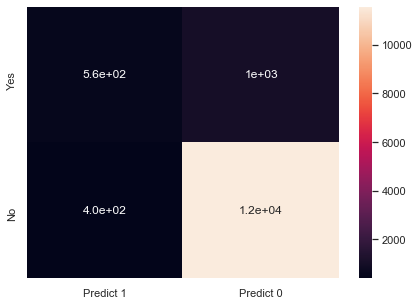

In [13]:
from sklearn.ensemble import AdaBoostClassifier

abcl_model = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl_model.fit(x_train, y_train)

score_and_plot_cm(abcl_model)

#### Ensemble Model - GradientBoost

------Train data scores-----

Accuracy: 0.907
Recall score: 0.376
Precision score: 0.690
F1 score: 0.487
ROC AUC score: 0.677

------Test data Scores------

Accuracy: 0.903
Recall score: 0.353
Precision score: 0.660
F1 score: 0.460
ROC AUC score: 0.664


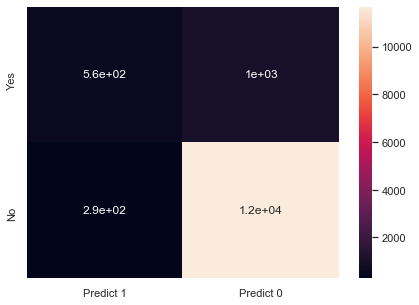

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl_model = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl_model.fit(x_train, y_train)

score_and_plot_cm(gbcl_model)

#### Ensemble Model - RandomForest Classifier

------Train data scores-----

Accuracy: 1.000
Recall score: 0.997
Precision score: 1.000
F1 score: 0.999
ROC AUC score: 0.999

------Test data Scores------

Accuracy: 0.906
Recall score: 0.430
Precision score: 0.647
F1 score: 0.517
ROC AUC score: 0.700


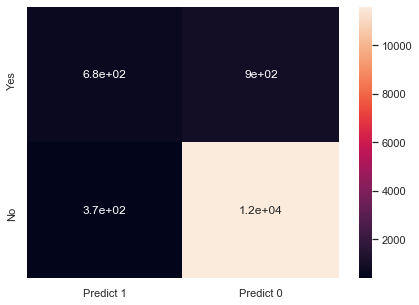

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfcl_model = RandomForestClassifier(n_estimators = 50, random_state=1, max_features=12)
rfcl_model.fit(x_train, y_train)

score_and_plot_cm(rfcl_model)

In [23]:
models = [log_reg_model, d_tree_model, bgcl_model, abcl_model, gbcl_model, rfcl_model]

models_df = pd.DataFrame(
    columns=['Accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC'], 
    index=[type(model).__name__ for model in models]
)

for model in models:
    y_predict = model.predict(x_test)
    model_name = type(model).__name__
    models_df.at[model_name, 'Accuracy',] = metrics.accuracy_score(y_test, y_predict)
    models_df.at[model_name, 'Recall'] = metrics.recall_score(y_test, y_predict)
    models_df.at[model_name, 'Precision'] = metrics.precision_score(y_test, y_predict)
    models_df.at[model_name, 'F1'] = metrics.f1_score(y_test, y_predict)
    models_df.at[model_name, 'ROC AUC'] = metrics.roc_auc_score(y_test, y_predict)
models_df = models_df.apply(pd.to_numeric)
models_df.head(6)

,Accuracy,Recall,Precision,F1,ROC AUC
LogisticRegression,0.900103,0.336484,0.638756,0.440776,0.655634
DecisionTreeClassifier,0.876143,0.476371,0.471028,0.473684,0.702742
BaggingClassifier,0.904453,0.456207,0.625756,0.527697,0.710027
AdaBoostClassifier,0.894353,0.352237,0.579876,0.438260,0.659211
GradientBoostingClassifier,0.903052,0.352867,0.660377,0.459959,0.664410
RandomForestClassifier,0.905927,0.430372,0.647393,0.517033,0.699656


In [24]:
# Best Accuracy

models_df[models_df['Accuracy'] == models_df['Accuracy'].max()]['Accuracy']

RandomForestClassifier    0.905927
Name: Accuracy, dtype: float64

In [25]:
# Best Recall score

models_df[models_df['Recall'] == models_df['Recall'].max()]['Recall']

DecisionTreeClassifier    0.476371
Name: Recall, dtype: float64

In [26]:
# Best Precision score

models_df[models_df['Precision'] == models_df['Precision'].max()]['Precision']

GradientBoostingClassifier    0.660377
Name: Precision, dtype: float64

In [27]:
# Best F1 score

models_df[models_df['F1'] == models_df['F1'].max()]['F1']

BaggingClassifier    0.527697
Name: F1, dtype: float64

In [28]:
# Best ROC AUC

models_df[models_df['ROC AUC'] == models_df['ROC AUC'].max()]['ROC AUC']

BaggingClassifier    0.710027
Name: ROC AUC, dtype: float64

### Decision

To help the bank identify potential customers who are relatively more likely to subscribe term deposit, we would need a model with a high True Positive Rate (TPR) or Recall. This is because the precision of the model is not really important as False Positives don't affect the goals of the bank in this case.

On inspecting the model performances in the dataframe above, I feel the best model for this problem is the BaggingClassifier because it has the best F1 and ROC AUC scores and has the second best Recall score which is happens to be our focus metric for this project.